In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from player import Player,Bot
from database import Database
import matplotlib.pyplot as plt

In [194]:
db = Database('games.csv','players.csv','moves.csv')

Text(0.5, 1.0, 'Number of times each character wins (O always goes first)')

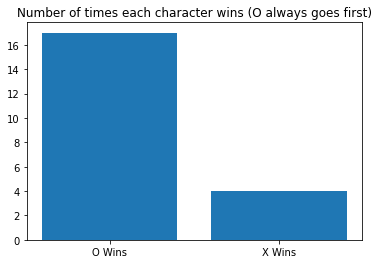

In [195]:
plt.bar(
    x=['O Wins','X Wins'],
    height=[
        db.games.apply(lambda x: x.player1==x.winner,axis=1).sum(),
        db.games.apply(lambda x: x.player2==x.winner,axis=1).sum()
    ],
)
plt.title('Number of times each character wins (O always goes first)')

Text(0.5, 1.0, 'How often each player goes second')

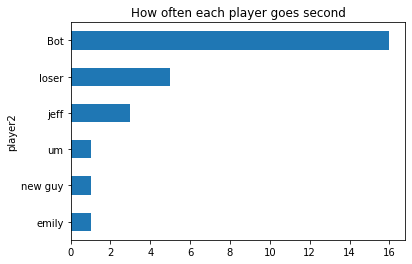

In [196]:
db.games.groupby('player2').game_id.count().sort_values().plot(kind='barh')
plt.title('How often each player goes second')

In [201]:
db.players.sum(axis=1)

jeff       13
Bot        16
emily      10
Emily       5
loser       8
new guy     1
um          1
dtype: int64

Text(0.5, 1.0, 'Average number of moves per game')

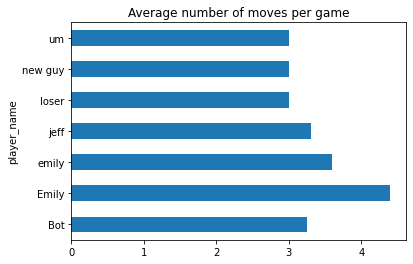

In [197]:
db.moves.groupby('player_name').move.count().to_frame().join(
    db.players.sum(axis=1).rename('num_games')
).apply(lambda x: x.move/x.num_games,axis=1).plot(kind='barh')
plt.title('Average number of moves per game')

Text(0.5, 1.0, 'Number of times each player draws')

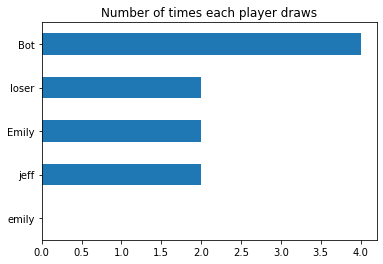

In [186]:
db.players.draw.sort_values().plot(kind='barh')
plt.title('Number of times each player draws')